In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

В таблице ниже -  ```id``` идентификатор человека

In [50]:
df = pd.read_excel('df_with_id.xlsx')
df

,name,id
0,data_entropyC\001_fb00_052.png,1
1,data_entropyC\001_fb01_055.png,1
2,data_entropyC\001_fn00_057.png,1
3,data_entropyC\001_fn01_064.png,1
4,data_entropyC\001_fn02_056.png,1
...,...,...
15265,GaitEntropy\Entropy_5.png,302
15266,GaitEntropy\Entropy_6.png,303
15267,GaitEntropy\Entropy_7.png,304
15268,GaitEntropy\Entropy_8.png,305


Закомментировал часть предобработки, потому что долго выполняется код, запускать повторно нет необходимости. Но смысл в том, что у нас имеется 15к энтропий походки для 306 человек. Размножаем наш датасет для сопоставления изображений каждый с каждым. Таким образом, размерность увеличивается пропорционально возведению в квадрат

In [ ]:
# df_sub = df.copy()
# df_sub.rename(columns={str(col):str(col)+'_sub' for col in df_sub.columns}, inplace=True)
# df_sub

In [4]:
# test = pd.DataFrame(columns = df.columns.tolist()+df_sub.columns.tolist())
# matrix = np.concatenate([np.tile(df.loc[0].values, (15270,1)),df_sub.values], axis=1)

In [5]:
# for i in tqdm_notebook(range(1,15270)):
#     matrix = np.concatenate([matrix, np.concatenate([np.tile(df.loc[i].values, (15270,1)), df_sub.values], axis=1)])

  0%|          | 0/15269 [00:00<?, ?it/s]

In [6]:
# tab = pd.DataFrame(matrix, columns = df.columns.tolist()+df_sub.columns.tolist())
# print(tab.shape)

(233172900, 4)


In [10]:
# tab['is_equal'] = 0
# tab.loc[tab['id_sub']==tab['id'], 'is_equal'] = 1
# tab

,name,id,name_sub,id_sub,is_equal
0,data_entropyC\001_fb00_052.png,1,data_entropyC\001_fb00_052.png,1,1
1,data_entropyC\001_fb00_052.png,1,data_entropyC\001_fb01_055.png,1,1
2,data_entropyC\001_fb00_052.png,1,data_entropyC\001_fn00_057.png,1,1
3,data_entropyC\001_fb00_052.png,1,data_entropyC\001_fn01_064.png,1,1
4,data_entropyC\001_fb00_052.png,1,data_entropyC\001_fn02_056.png,1,1
...,...,...,...,...,...
233172895,GaitEntropy\Entropy_9.png,306,GaitEntropy\Entropy_5.png,302,0
233172896,GaitEntropy\Entropy_9.png,306,GaitEntropy\Entropy_6.png,303,0
233172897,GaitEntropy\Entropy_9.png,306,GaitEntropy\Entropy_7.png,304,0
233172898,GaitEntropy\Entropy_9.png,306,GaitEntropy\Entropy_8.png,305,0


In [11]:
# tab.to_csv('big_file_with_target.csv', index=False, encoding='cp1251', sep=';')

In [3]:
# table = pd.DataFrame()
# for f in tqdm_notebook(df['name']):
#     t1 = pd.merge(df[df['name']==f], df_sub, left_on='name', right_on='name_sub', how='right')
#     for col in df.columns:
#         t1[col] = df[df['name']==f][col].tolist()[0]
    
#     table = pd.concat([table, t1])

# table['is_equal'] = 0
# table.loc[table['id_sub']==table['id'], 'is_equal'] = 1
# table.reset_index(drop=True, inplace=True)
# table.shape

In [ ]:
# matrix = np.concatenate([matrix, np.concatenate([np.tile(df.loc[i].values, (15270,1)), df_sub.values], axis=1)])

In [4]:
# table.to_csv('big_file.csv', index=False, encoding='cp1251', sep=';')

Все, что описано выше проделал и записал часть в отдельный файл. Получился очень большой датасет, поэтому сделал балансировку классов и получилась выборка в 3,5 млн объектов

In [52]:
df = pd.read_csv('3m_dataset.csv', sep=';')
df

,name,id,name_sub,id_sub,is_equal
0,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fb00_061.png,2,0
1,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fb01_070.png,2,0
2,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fn00_081.png,2,0
3,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fn01_074.png,2,0
4,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fn02_073.png,2,0
...,...,...,...,...,...
3486517,GaitEntropy\Entropy_5.png,302,GaitEntropy\Entropy_5.png,302,1
3486518,GaitEntropy\Entropy_6.png,303,GaitEntropy\Entropy_6.png,303,1
3486519,GaitEntropy\Entropy_7.png,304,GaitEntropy\Entropy_7.png,304,1
3486520,GaitEntropy\Entropy_8.png,305,GaitEntropy\Entropy_8.png,305,1


Пример энтропии

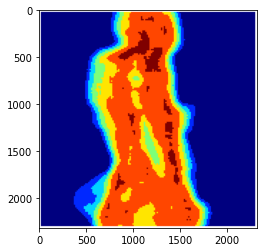

In [53]:
a = cv2.imread(df['name'][0])
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.imshow(a)

Ниже чтение и предоботка изображений. Они все приведены к единому размеру (300)

In [9]:
# images = [cv2.resize(cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB), (10,10), interpolation=cv2.INTER_AREA) for f in tqdm_notebook(df['name'])]
# images = [imag.reshape(100,3) for imag in tqdm_notebook(images)]
# images = [imag.reshape(300) for imag in tqdm_notebook(images)]

In [10]:
# df = pd.concat([df, pd.DataFrame(images)], axis=1)
# df

In [11]:
# del images
# del a

In [14]:
# df.to_csv('images_parsed.csv', index=False, encoding='cp1251', sep=';')

К нашей таблице с названиями файлов (3.5 млн) приклеиваем вектора изображений для названия слева и справа соответственно

In [5]:
images = pd.read_csv('images_parsed.csv', sep=';')
df = pd.read_csv('3m_dataset.csv', sep=';')

In [6]:
%%time
df = pd.merge(df, images, on='name', how='left')

Wall time: 3.97 s


In [7]:
%%time
df = pd.merge(df, images, left_on='name_sub', right_on='name', how='left')

Wall time: 27.9 s


In [8]:
df

,name_x,id,name_sub,id_sub,is_equal,0_x,1_x,2_x,3_x,4_x,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fb00_061.png,2,0,42,42,-108,22,22,...,22,-67,-115,84,22,26,-109,41,41,-108
1,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fb01_070.png,2,0,42,42,-108,22,22,...,22,-62,-118,78,22,24,-112,41,41,-108
2,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fn00_081.png,2,0,42,42,-108,22,22,...,22,-105,-122,110,22,22,-118,41,41,-108
3,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fn01_074.png,2,0,42,42,-108,22,22,...,22,-122,121,113,22,22,-118,41,41,-108
4,data_entropyC\001_fb00_052.png,1,data_entropyC\002_fn02_073.png,2,0,42,42,-108,22,22,...,22,-57,-111,75,22,27,-107,41,41,-108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486517,GaitEntropy\Entropy_5.png,302,GaitEntropy\Entropy_5.png,302,1,-125,-76,-106,67,79,...,-64,34,117,-63,27,72,-75,41,41,-108
3486518,GaitEntropy\Entropy_6.png,303,GaitEntropy\Entropy_6.png,303,1,90,-107,-80,-114,-105,...,-116,42,113,-67,43,80,-104,41,41,-108
3486519,GaitEntropy\Entropy_7.png,304,GaitEntropy\Entropy_7.png,304,1,65,118,-84,82,-65,...,-51,31,87,-66,23,37,-105,41,41,-108
3486520,GaitEntropy\Entropy_8.png,305,GaitEntropy\Entropy_8.png,305,1,42,42,-108,22,22,...,-75,26,84,-52,25,80,-49,41,48,-100


Получили такую таблицу, далее удаляем ненужные столбцы и делим на трейн и тест выборки

In [9]:
train_set, test_set, train_label, test_label = train_test_split(df.drop(['name_x', 'name_y', 'id', 'id_sub', 'is_equal', 'name_sub'], axis=1), df['is_equal'],
                                                               test_size=0.25, shuffle=True)
print(train_set.shape)
print(test_set.shape)

(2614891, 600)
(871631, 600)


In [10]:
train_label.value_counts()

0    1499747
1    1115144
Name: is_equal, dtype: int64

In [11]:
test_label.value_counts()

0    500253
1    371378
Name: is_equal, dtype: int64

Обучаем модели. Пробовал Катбуст, Логистическую регрессию и нейронную сеть. Результат везде один и тот же... Поэтому для примера оставил только ЛогРег.

In [ ]:
from catboost import CatBoostClassifier

In [48]:
# cb = CatBoostClassifier(depth=6, n_estimators=10000, learning_rate=0.1)
# cb.fit(train_set, train_label)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log = LogisticRegression(C=7)
log.fit(train_set, train_label)

LogisticRegression(C=7)

Тестируем качество: сверху обучающая - снизу тестовая

In [14]:
print(classification_report(train_label, log.predict(train_set)))
print(classification_report(test_label, log.predict(test_set)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1499747
           1       1.00      1.00      1.00   1115144

    accuracy                           1.00   2614891
   macro avg       1.00      1.00      1.00   2614891
weighted avg       1.00      1.00      1.00   2614891

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    500253
           1       1.00      1.00      1.00    371378

    accuracy                           1.00    871631
   macro avg       1.00      1.00      1.00    871631
weighted avg       1.00      1.00      1.00    871631



Для валидационной выборки берем данные от заказчика и посмотрим качество на них. Делаем аналогичный препроцессинг

In [16]:
files = glob('GaitEntropy/*')
images = [cv2.resize(cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB), (10,10), interpolation=cv2.INTER_AREA) for f in files]
images = [imag.reshape(100,3) for imag in images]
images = [imag.reshape(300) for imag in images]

In [18]:
data = pd.DataFrame(images)
data['name'] = files
data

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,name
0,42,42,-108,63,-96,-74,82,-80,-83,89,...,30,91,-48,22,39,-91,41,50,-94,GaitEntropy\Entropy_1.png
1,-96,-63,124,88,-101,-78,56,97,-97,114,...,32,111,-52,27,61,-95,41,41,-108,GaitEntropy\Entropy_10.png
2,51,91,-84,124,-49,-109,127,-93,121,58,...,111,-19,-98,98,-70,-99,43,83,-55,GaitEntropy\Entropy_11.png
3,42,42,-108,22,22,-118,22,22,-118,66,...,37,84,-78,22,22,-118,41,62,-75,GaitEntropy\Entropy_12.png
4,45,76,-79,103,-71,-106,105,-110,-116,93,...,60,-88,-53,34,-120,-29,43,63,-92,GaitEntropy\Entropy_13.png
5,42,42,-108,22,22,-118,22,22,-118,22,...,22,23,-117,22,22,-118,41,41,-108,GaitEntropy\Entropy_14.png
6,88,-118,-82,-119,118,94,98,-90,-93,-110,...,-128,-35,-117,110,-78,-110,82,-94,-61,GaitEntropy\Entropy_15.png
7,66,-126,-55,126,-106,118,54,104,-91,90,...,51,-106,-60,22,35,-96,41,41,-108,GaitEntropy\Entropy_16.png
8,42,42,-108,22,22,-118,22,22,-118,23,...,22,23,-116,22,22,-118,41,47,-99,GaitEntropy\Entropy_17.png
9,42,42,-108,92,80,118,-117,127,98,44,...,25,72,-65,22,25,-112,41,41,-108,GaitEntropy\Entropy_18.png


In [19]:
data_sub = data.copy()
data_sub.rename(columns={str(col):str(col)+'_sub' for col in data_sub.columns}, inplace=True)

In [24]:
tab = pd.DataFrame(columns = data.columns.tolist()+data_sub.columns.tolist())
matrix = np.concatenate([np.tile(data.loc[0].values, (25,1)),data_sub.values], axis=1)

In [25]:
for i in tqdm_notebook(range(1,25)):
    matrix = np.concatenate([matrix, np.concatenate([np.tile(data.loc[i].values, (25,1)), data_sub.values], axis=1)])

  0%|          | 0/24 [00:00<?, ?it/s]

In [27]:
tab = pd.DataFrame(matrix, columns = data.columns.tolist()+data_sub.columns.tolist())
tab['is_equal'] = 0
tab.loc[tab['name']==tab['name_sub'], 'is_equal'] = 1
tab

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,name_sub,is_equal
0,42,42,-108,63,-96,-74,82,-80,-83,89,...,91,-48,22,39,-91,41,50,-94,GaitEntropy\Entropy_1.png,1
1,42,42,-108,63,-96,-74,82,-80,-83,89,...,111,-52,27,61,-95,41,41,-108,GaitEntropy\Entropy_10.png,0
2,42,42,-108,63,-96,-74,82,-80,-83,89,...,-19,-98,98,-70,-99,43,83,-55,GaitEntropy\Entropy_11.png,0
3,42,42,-108,63,-96,-74,82,-80,-83,89,...,84,-78,22,22,-118,41,62,-75,GaitEntropy\Entropy_12.png,0
4,42,42,-108,63,-96,-74,82,-80,-83,89,...,-88,-53,34,-120,-29,43,63,-92,GaitEntropy\Entropy_13.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,104,119,-117,101,112,127,108,100,106,-93,...,117,-63,27,72,-75,41,41,-108,GaitEntropy\Entropy_5.png,0
621,104,119,-117,101,112,127,108,100,106,-93,...,113,-67,43,80,-104,41,41,-108,GaitEntropy\Entropy_6.png,0
622,104,119,-117,101,112,127,108,100,106,-93,...,87,-66,23,37,-105,41,41,-108,GaitEntropy\Entropy_7.png,0
623,104,119,-117,101,112,127,108,100,106,-93,...,84,-52,25,80,-49,41,48,-100,GaitEntropy\Entropy_8.png,0


Вуаля, ничего хорошего не получилось...

In [28]:
print(classification_report(tab['is_equal'], log.predict(tab.drop(['name', 'name_sub', 'is_equal'], axis=1))))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       600
           1       0.04      1.00      0.08        25

    accuracy                           0.04       625
   macro avg       0.52      0.50      0.04       625
weighted avg       0.96      0.04      0.01       625



In [29]:
log.predict(tab.drop(['name', 'name_sub', 'is_equal'], axis=1))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Ниже можно не смотреть :)

In [39]:
from keras import Model, Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Input, Flatten
from keras.callbacks import EarlyStopping
from keras.losses import sparse_categorical_crossentropy

In [54]:
train_set = np.expand_dims(np.asarray(train_set), axis=2).astype(np.float32)
test_set = np.expand_dims(np.asarray(test_set), axis=2).astype(np.float32)

In [41]:
train_label = np.asarray(train_label).astype(np.float32)
test_label = np.asarray(test_label).astype(np.float32)

In [43]:
inp = Input(shape=(600,1))
x = Dense(300, activation='tanh')(inp)
x = Conv1D(256, 2, padding='same', activation='relu')(x)
x = MaxPooling1D(2)(x)
# x = Conv1D(256, 2, padding='same', activation='relu')(x)
# x = MaxPooling1D(2)(x)
x = Flatten()(x)
out = Dense(2, activation='softmax')(x)

# out = Dense(2, activation='softmax', name='classification')(x)

In [44]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [45]:
model = Model(inp, out)
model.compile(optimizer='adam',
                       loss = sparse_categorical_crossentropy, metrics = ['accuracy'])

In [47]:
model.fit(train_set, train_label, epochs=100, batch_size=32, validation_data=[test_set, test_label], callbacks=[early_stop],
         use_multiprocessing=True)

Epoch 1/100
 1307/81716 [..............................] - ETA: 3:41:36 - loss: 0.2901 - accuracy: 0.9834

KeyboardInterrupt: 